# Introduction to Cirq

This notebook will teach you the basics of simulation of quantum circuits using Cirq. 

# Install Cirq

Install Cirq if you haven't.

In [2]:
!pip install --quiet cirq

     |████████████████████████████████| 1.5 MB 8.2 MB/s 
     |████████████████████████████████| 380 kB 43.0 MB/s 
     |████████████████████████████████| 1.3 MB 32.5 MB/s 


# Importing packages

In [11]:
import cirq # No need to explain why
from cirq.contrib.svg import SVGCircuit # Required to display some fancy circuits
import numpy as np # Required to play around with pi

# Creating circuits

How to create quantum circuits in Cirq

## Step 1: Initialize circuit

Prepare the quantum circuit. This requires two steps:
1. Initialize a quantum circuit
2. Initialize the required number of qubits

In [19]:
# Initialize circuit 
circuit = cirq.Circuit()

In [20]:
# Initialize qubits
q0, q1 = cirq.LineQubit.range(2)

## Step 2: Apply gates

Now, we shall start applying the gates

In [21]:
# Prepare X gate on qubit 0
circuit.append(cirq.X(q0))

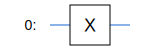

In [22]:
# Visualize the circuit
SVGCircuit(circuit)

In [23]:
# Hadamard gate
circuit.append(cirq.H(q0))

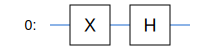

In [24]:
# Visualize the circuit
SVGCircuit(circuit)

In [25]:
# Rx gate
circuit.append(cirq.rx(np.pi/4)(q0))

# Ry gate
circuit.append(cirq.ry(np.pi/8)(q0))

# Rz gate
circuit.append(cirq.rz(np.pi/16)(q0))

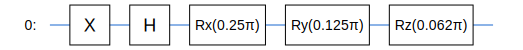

In [26]:
# Visualize the circuit
SVGCircuit(circuit)

In [27]:
# CNOT gate
circuit.append(cirq.CNOT(q0, q1))

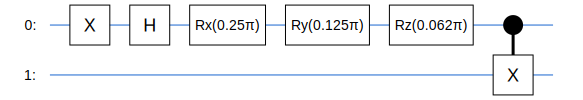

In [28]:
# Visualize the circuit
SVGCircuit(circuit)

## Step 3: Measure

In [29]:
# Meaure qubits 0,1
circuit.append(cirq.measure(q0, q1, key='0'))

# Circuit Simulation

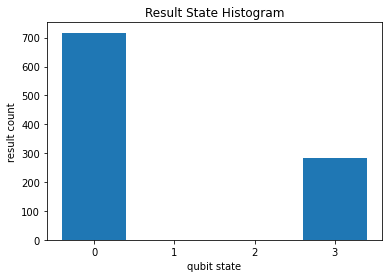

In [30]:
s=cirq.Simulator()
samples=s.run(circuit, repetitions=1000)

# Plot the results
cirq.vis.plot_state_histogram(samples)

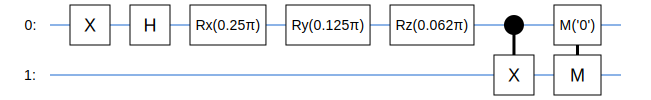

In [31]:
# Visualize the circuit
SVGCircuit(circuit)

# Reading the statevector

During simulations, Cirq allows one to take a sneak peak at the state.

In [32]:
# Initialize circuit 
circuit = cirq.Circuit()

# Initialize qubits
q0, q1 = cirq.LineQubit.range(2)

# Prepare Hadamrad gate on qubit 0
circuit.append(cirq.H(q0))

# Prepare Hadamrad gate on qubit 1
circuit.append(cirq.H(q1))

# Extract the statevector
s=cirq.Simulator()
result=s.simulate(circuit)
statevector = result.final_state_vector
print(statevector)

[0.49999997+0.j 0.49999997+0.j 0.49999997+0.j 0.49999997+0.j]
